In [1]:
from model.MatFileStorageParser import FileModel

In [2]:
file = "use_case_1.mat"

bs, nf, nm = FileModel.load_file_basic(file)

In [3]:
bs

array([[ 8.16656737, 19.20507094, 40.        ],
       [31.77314358, 15.57242849, 40.        ],
       [22.40848085, 17.34381643, 40.        ],
       [ 6.37521735, 28.58327261, 40.        ],
       [24.6808002 , 15.6379201 , 40.        ],
       [17.77611796, 30.53650339, 40.        ],
       [25.95656204, 27.60179159, 40.        ],
       [ 8.42457642, 29.96877388, 40.        ],
       [16.37774112, 15.53561626, 40.        ],
       [18.88307187, 15.67765058, 40.        ],
       [17.94244455,  3.46016187, 40.        ],
       [10.42099564, 12.96158732, 40.        ],
       [21.08949468, 17.8843151 , 40.        ],
       [11.78887315, 17.15984477, 40.        ],
       [10.54403941, 30.93156834, 40.        ],
       [16.89252085,  7.45770651, 40.        ],
       [17.05949093,  8.36337465, 40.        ],
       [21.35867331, 21.97006673, 40.        ],
       [10.53921334, 30.02401287, 40.        ],
       [11.80672265, 33.50251702, 40.        ],
       [10.81368257, 33.57836559,  0.1  

In [4]:
print(nf)
print(nm)

100
20


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [6]:

def generar_mapa_calor(base_stations, grid_size=100, bandwidth=1.0, border=3):
    """
    base_stations: array de shape (N, 2) con coordenadas x, y de estaciones base
    grid_size: resolución del mapa de calor
    bandwidth: suavizado del KDE
    """
    x = base_stations[:, 0]
    y = base_stations[:, 1]
    
    # Crear el KDE
    kde = gaussian_kde(np.vstack([x, y]), bw_method=bandwidth)
    
    # Borders 
    
    x_min = x.min() - x.min() * border
    x_max = x.max() + x.max() * border
    y_min = y.min() - y.min() * border
    y_max = y.max() + y.max() * border
    
    # Crear la malla
    xi, yi = np.meshgrid(
        np.linspace(x_min , x_max, grid_size),
        np.linspace(y_min , y_max, grid_size)
    )
    coords = np.vstack([xi.ravel(), yi.ravel()])
    zi = kde(coords).reshape(xi.shape)
    
    # Normalizar para usar como distribución de probabilidad
    zi_norm = zi / zi.sum()
    
    return xi, yi, zi_norm


In [7]:
def muestrear_usuarios(xi, yi, zi_norm, num_usuarios=100):
    """
    xi, yi: malla de coordenadas del mapa de calor
    zi_norm: densidad normalizada
    """
    flat_probs = zi_norm.ravel()
    flat_probs /= flat_probs.sum()  # asegurar suma 1
    
    indices = np.random.choice(len(flat_probs), size=num_usuarios, p=flat_probs)
    
    x_coords = xi.ravel()[indices]
    y_coords = yi.ravel()[indices]
    
    return np.vstack((x_coords, y_coords)).T


Text(0.5, 0.98, 'Mapa de calor con distribución de usuarios')

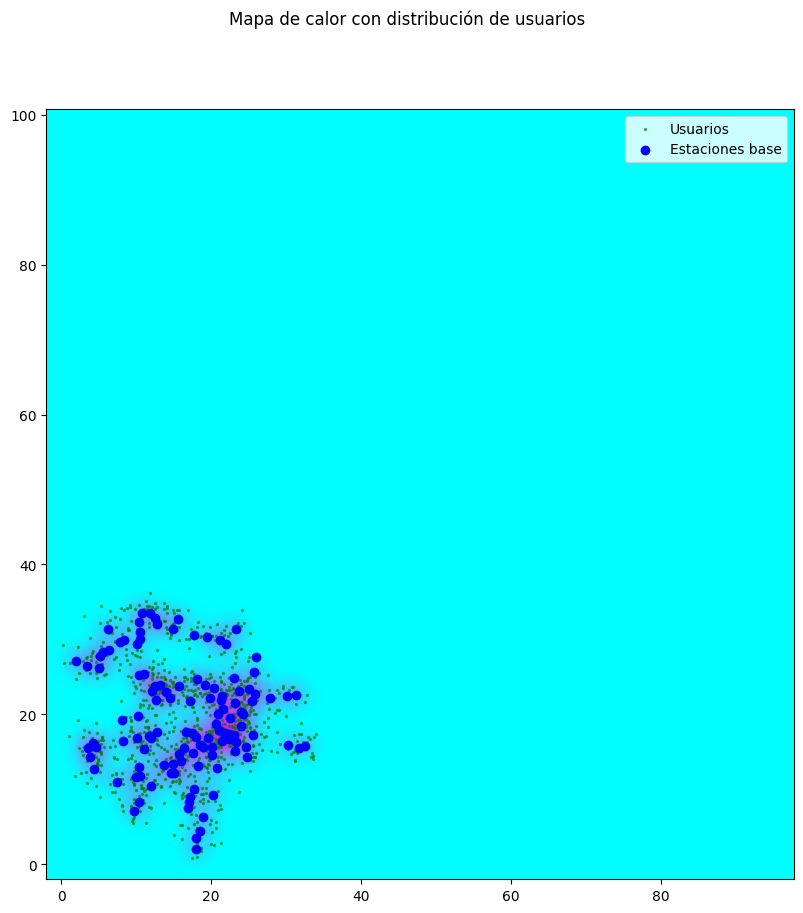

In [8]:
# Ejemplo de uso
xi, yi, zi_norm = generar_mapa_calor(base_stations=bs[nm:], bandwidth=0.2, border=2, grid_size=1000)

usuarios = muestrear_usuarios(xi, yi, zi_norm, 1000)




fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(zi_norm, origin='lower', extent=(xi.min(), xi.max(), yi.min(), yi.max()), cmap='cool')
ax.scatter(usuarios[:, 0], usuarios[:, 1], s=2, color='green', alpha=0.6, label="Usuarios")
ax.scatter(bs[:, 0], bs[:, 1], color='blue', label="Estaciones base")
ax.legend()
fig.suptitle("Mapa de calor con distribución de usuarios")



In [9]:
import model.SpatialHeatMap as HeatMap

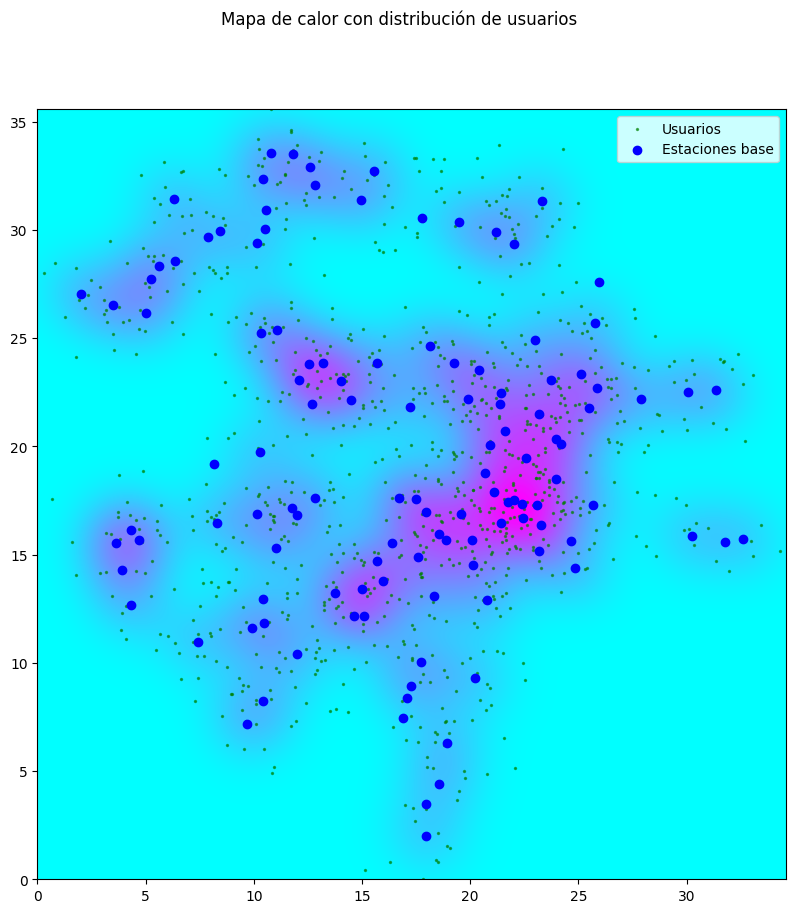

In [11]:
# Ejemplo de uso
xi, yi, zi_norm = HeatMap.generate_heat_map_from_topo(base_stations=bs[nm:], bandwidth=0.2, border=2, grid_size=1000)

usuarios = muestrear_usuarios(xi, yi, zi_norm, 1000)




fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(zi_norm, origin='lower', extent=(xi.min(), xi.max(), yi.min(), yi.max()), cmap='cool')
ax.scatter(usuarios[:, 0], usuarios[:, 1], s=2, color='green', alpha=0.6, label="Usuarios")
ax.scatter(bs[:, 0], bs[:, 1], color='blue', label="Estaciones base")
ax.legend()
fig.suptitle("Mapa de calor con distribución de usuarios")
plt.show()
